# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
   

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
citiesweather =[]
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&q="
limit = 1
for i in cities:
    query_url = f"{url}{i}&limit={limit}&appid={weather_api_key}"
    weather_response =requests.get(query_url)
    weather_json = weather_response.json()
    try: 
        weather_data ={
        "City": weather_json["name"],
        "Lat" : weather_json["coord"]["lat"],
        "Lng" : weather_json["coord"]["lon"],
        "Max Temp(f)": weather_json["main"]["temp_max"],
        "Humidity": weather_json["main"]["humidity"],
        "Cloudiness": weather_json["clouds"]["all"],
        "Wind Speed": weather_json["wind"]["speed"],
        "Country" : weather_json["sys"]["country"],
        "Date": weather_json["dt"]}
        citiesweather.append(weather_data) 
    except:
        print("Wasn't found")

Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found
Wasn't found


In [43]:
weather_data =pd.DataFrame(citiesweather)
weather_data.count()

City           594
Lat            594
Lng            594
Max Temp(f)    594
Humidity       594
Cloudiness     594
Wind Speed     594
Country        594
Date           594
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
weather_data.to_csv("output_data/cities.csv",encoding="utf-8", index=True, header=True)
weather_data.display()

In [48]:
# Export the city data into a .csv.
# Display the DataFrame 
weather_data.to_csv("output_data/cities.csv",encoding="utf-8", index=True, header=True) 
print(weather_data)

                 City      Lat       Lng  Max Temp(f)  Humidity  Cloudiness  \
0           Byron Bay -28.6500  153.6167        51.94        68          65   
1            Hermanus -34.4187   19.2345        52.81        68          88   
2             Chapais  49.7834  -74.8492        62.38        91         100   
3           Nha Trang  12.2500  109.1833        84.20        87          87   
4             Mataura -46.1927  168.8643        32.56        97          67   
..                ...      ...       ...          ...       ...         ...   
589     Ryōtsu-minato  38.0833  138.4333        76.78        82           2   
590      St. George's  12.0564  -61.7485        82.90        61           1   
591   Havre-St-Pierre  50.2334  -63.5986        61.16        94         100   
592            Nóvita   4.9551  -76.6053        87.89        63          72   
593  San Buenaventura  27.0833 -101.5333        87.48        47          76   

     Wind Speed Country        Date  
0         13.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
dryweather_data=weather_data[weather_data["Humidity"] <100]
dryweather_data.count()


City           593
Lat            593
Lng            593
Max Temp(f)    593
Humidity       593
Cloudiness     593
Wind Speed     593
Country        593
Date           593
dtype: int64

In [40]:
#  Get the indices of cities that have humidity over 100%.
moistweather_data=weather_data[weather_data["Humidity"]>100]
moistweather_data.head()


,City,Lat,Lng,Max Temp(f),Humidity,Cloudiness,Wind Speed,Country,Date


In [63]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=dryweather_data.rename(mapper=None, index=str, columns=None, axis=None, copy=True, inplace=False, level=None)
display(clean_city_data)


,City,Lat,Lng,Max Temp(f),Humidity,Cloudiness,Wind Speed,Country,Date
0,Byron Bay,-28.6500,153.6167,51.94,68,65,13.13,AU,1659113694
1,Hermanus,-34.4187,19.2345,52.81,68,88,17.74,ZA,1659113694
2,Chapais,49.7834,-74.8492,62.38,91,100,10.51,CA,1659113694
3,Nha Trang,12.2500,109.1833,84.20,87,87,6.62,VN,1659113454
4,Mataura,-46.1927,168.8643,32.56,97,67,2.30,NZ,1659113695
...,...,...,...,...,...,...,...,...,...
589,Ryōtsu-minato,38.0833,138.4333,76.78,82,2,3.94,JP,1659114064
590,St. George's,12.0564,-61.7485,82.90,61,1,12.06,GD,1659114064
591,Havre-St-Pierre,50.2334,-63.5986,61.16,94,100,12.66,CA,1659114065
592,Nóvita,4.9551,-76.6053,87.89,63,72,3.20,CO,1659114065


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [70]:
# MODEL CODE FROM ASK BCS
# plt.scatter(lats,
#            max_temps,
#            edgecolor="black", linewidths=1, marker="o",
#            alpha=0.8, label="Cities")
# # Incorporate the other graph properties
# plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# plt.ylabel("Max Temperature (F)")
# plt.xlabel("Latitude")
# plt.grid(True)
# # Save the figure
# plt.savefig("output_data/Fig1.png")
# # Show plot
# plt.show()

# Also please try to have
# % matplotlib inline

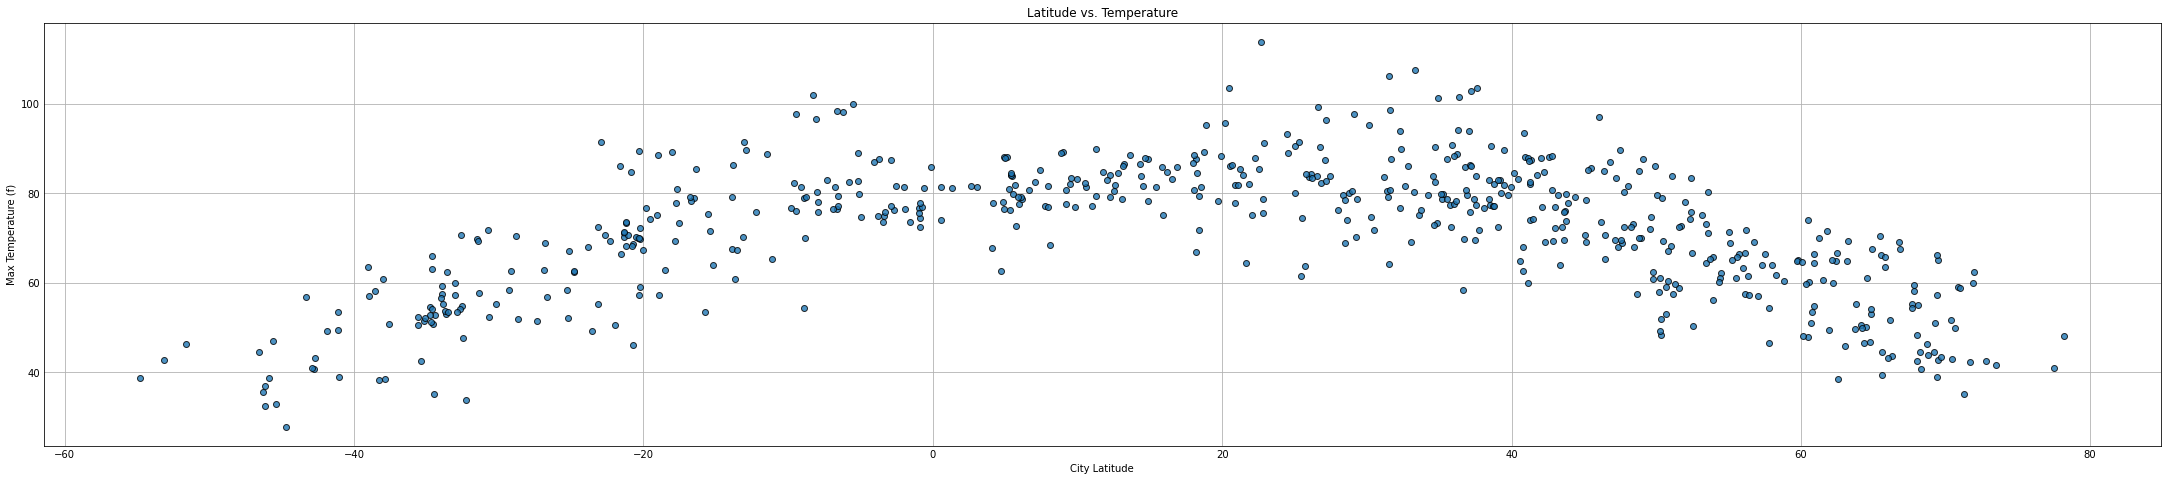

In [128]:
# # make the data
x = clean_city_data["Lat"]
y = clean_city_data["Max Temp(f)"]

# # size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))

# # plot
plt.scatter(x,
           y,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")
plt.rcParams["figure.figsize"] = (70,6)

# plt.scatter(x,
#             y, 
#             edgecolor="black",
#             s=sizes, 
#             c=colors, 
#            )

# Create a title, x label, and y label for our chart
# fig=plt.figure()
# fig.set_size_inches(5,5)
# plt.figure(figsize=(20,40)
plt.title("Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (f)")
plt.grid(True)
# plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

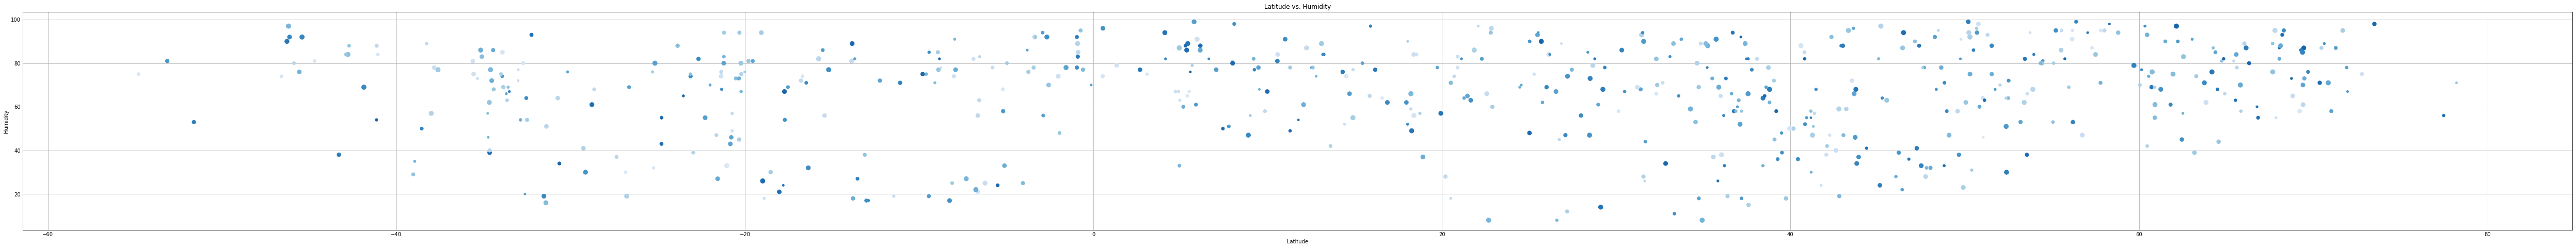

In [130]:


# # make the data
x = clean_city_data["Lat"]
y = clean_city_data["Humidity"]

# # size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))
# plt.rcParams["figure.figsize"] = (70,6)
# # plot

plt.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

# set(xlim=(-60, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

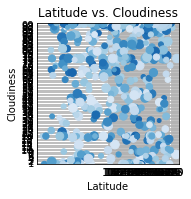

In [76]:

# # make the data
x = clean_city_data["Lat"]
y = clean_city_data["Cloudiness"]

# # size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# # plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(-60, 80), xticks=np.arange(10, 80),
       ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

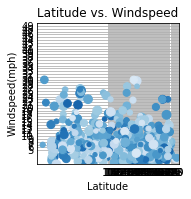

In [78]:
# # make the data
x = clean_city_data["Lat"]
y = clean_city_data["Wind Speed"]

# # size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# # plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(-60, 80), xticks=np.arange(10, 80),
       ylim=(0, 50), yticks=np.arange(5, 50))
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")

plt.show()

## Linear Regression


In [117]:
x=clean_city_data["Lat"]
# filter into =>1 and above = Northern Hemisphere
NHemi=clean_city_data.loc[clean_city_data["Lat"] >= 0]
#filter into =<1 and below = Southern Hemisphere
SHemi=clean_city_data.loc[clean_city_data["Lat"] <= 0]
# NHemi.count()
# 409
# SHemi.count()
# 184

City           184
Lat            184
Lng            184
Max Temp(f)    184
Humidity       184
Cloudiness     184
Wind Speed     184
Country        184
Date           184
dtype: int64

In [113]:

# # make the data
x = NHemi
y = clean_city_data["Max Temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))

# # plot
# fig, ax = plt.subplots()

plt.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
ax.set(xlim=(0, 80), xticks=np.arange(10, 80),
       ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Max Tempurature(f)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature(f)")
# print(f"The r-squared is: {rvalue**2}")
plt.show()

TypeError: can only concatenate str (not "float") to str

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


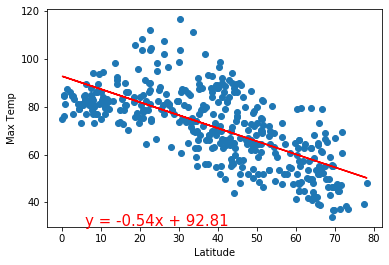

In [25]:
# # Plot the different factors in a scatter plot
# x_values = clean_city_data["Lat"]
# y_values = clean_city_data["Max Tempurature(f)"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Normalized Blood Pressure')
# plt.ylabel('1Y_Disease_Progress')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


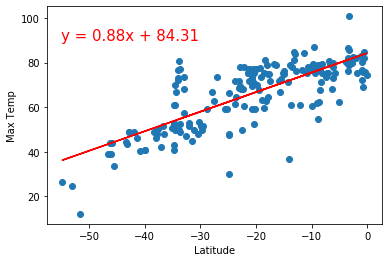

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


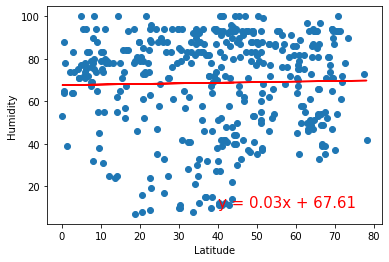

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


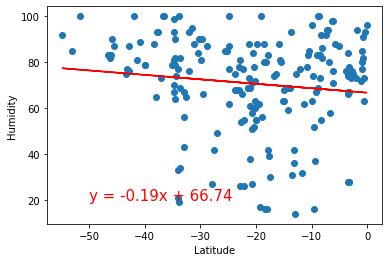

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


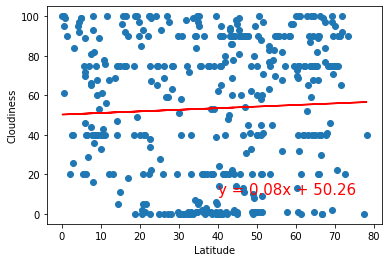

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


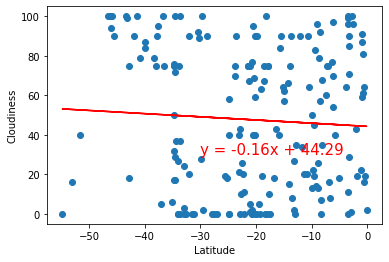

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


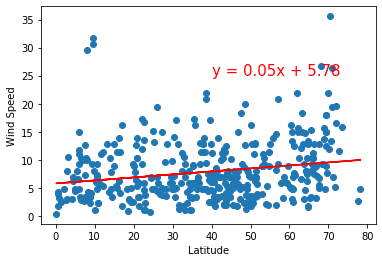

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


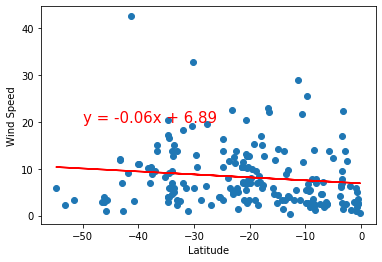